### Notebook to test features of neuron_igraph_analysis

In [55]:
import sys
sys.path.append(r'C:\Users\ahshenas\Documents\GitHub\neuron-igraph-analysis')
sys.path.append(r'C:\Users\ahshenas\Documents\GitHub\custom-plotting')
import neuron_igraph_analysis as nrn_graph
from swarm import swarm

import matplotlib.pyplot as plt
import numpy as np

In [56]:
skeleton_w_syns = nrn_graph.initialize_dataframe()
g = nrn_graph.createGraph(skeleton_w_syns)

# Calculate syn distances
nrn_graph.calculateSynDistance(g, skeleton_w_syns, outputsyn=13018)

  0%|          | 0/13596 [00:00<?, ?it/s]

In [57]:
# Create all lists for swarm plot

lastRowId = skeleton_w_syns['rowId'].iat[-1]
temp_skel_w_syns = skeleton_w_syns.loc[skeleton_w_syns['rowId'] < lastRowId]

targetPFL3 = list(temp_skel_w_syns.loc[temp_skel_w_syns['instance_pre'] == 'PFL3(PB12c)_R2_C1_irreg', 'distance_um'])
allPFL3 = list(temp_skel_w_syns.loc[temp_skel_w_syns['type_pre'] == 'PFL3', 'distance_um'])
allSyns = list(temp_skel_w_syns.loc[temp_skel_w_syns['structure'] == 'post', 'distance_um'])

53 points not plotted on list 2
12661 points not plotted on list 3


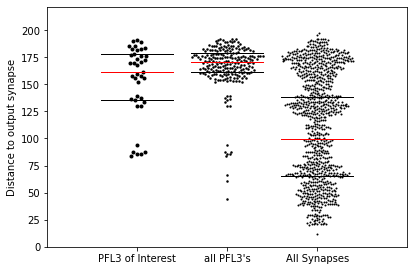

In [58]:
# Create a swarm plot of the distances

figureWidth = 6
figureHeight = 3
panelWidth = 5
panelHeight = 2.5

panel = plt.axes([0.1, 0.1, panelWidth/figureWidth, panelHeight/figureHeight])

# Get distance to output synapse from all synapses
yLists = [targetPFL3, allPFL3, allSyns]
pointsizes = [4, 2.5, 2]
xmin, xmax = 0, 10
xticks = np.linspace(0, xmax, len(yLists)+2)[1:-1]
width = 2

for index, (yList, pointsize) in enumerate(zip(yLists, pointsizes)):
    ymin, ymax = 0, max(yList)*1.1
    center = xticks[index]

    extrapoints = swarm(yList, panel,
                        center=center, width=width,
                        xmin=xmin, xmax=xmax,
                        ymin=ymin, ymax=ymax,
                        panelWidth=panelWidth,
                        panelHeight=panelHeight,
                        pointsize=pointsize)
    if extrapoints > 0:
        print(f"{extrapoints} points not plotted on list {index+1}")



# Set plotting details
panel.set_xlim([xmin, xmax])
panel.set_ylim([ymin, ymax])

panel.set_xticks(xticks)
panel.set_xticklabels(['PFL3 of Interest', 'all PFL3\'s','All Synapses'])
panel.set_ylabel('Distance to output synapse')

panel.tick_params(bottom=True, labelbottom=True,
                  left=True, labelleft=True,
                  right=False, labelright=False,
                  top=False, labeltop=False,)

plt.savefig("syn_dist_to_output_swarm.png", dpi=600)
plt.show()